In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_palette('deep')
plt.rcParams['text.usetex'] = True

In [2]:
totalsize = [1000001]
V = [0.01]
omega = [0.1]
disorder = [4,3,2]

In [3]:
p = {}
w = {}
TIME = {}
CORR = {}

for i in totalsize:
    for j in V:
        for k in omega:
            for l in disorder:
                w["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_w_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                p["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_p_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                TIME["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_TIME_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))
                CORR["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_CORR_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))


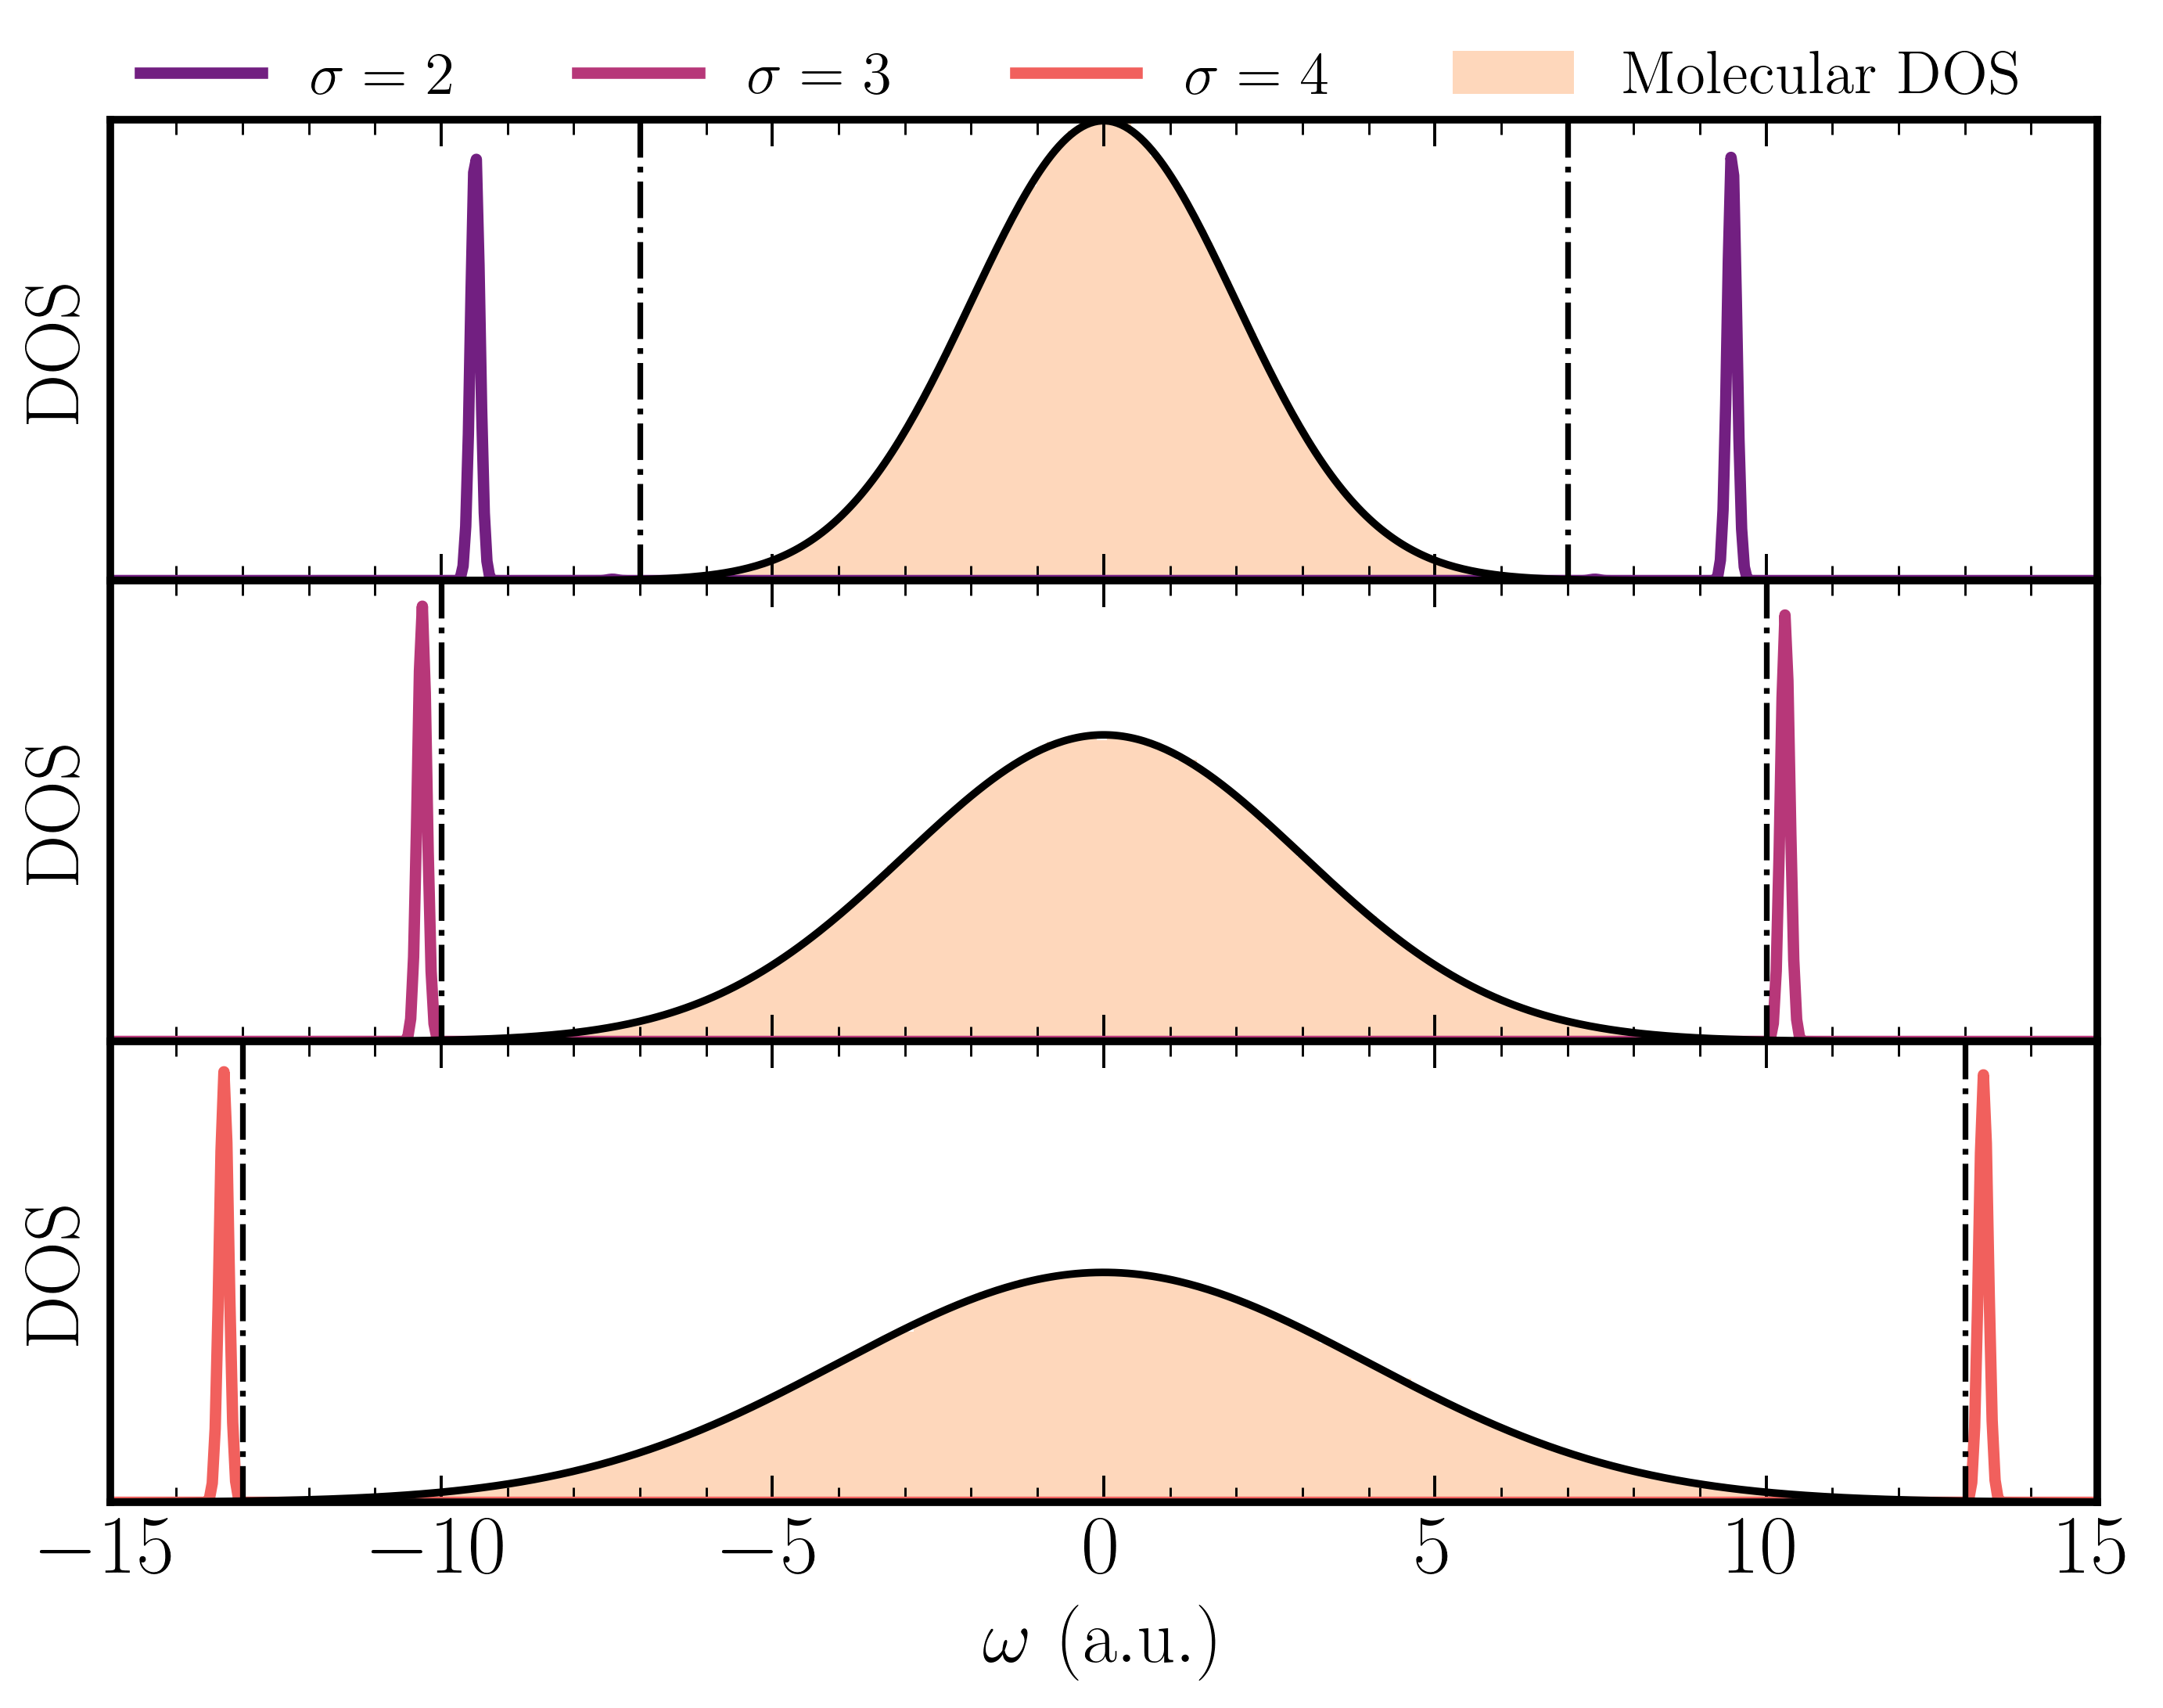

In [4]:
fig, axes = plt.subplots(3, 1, sharex=True,sharey=True, figsize=(8, 6), gridspec_kw={'hspace': 0},dpi=350)

phases = np.array([0,6])
norm2 = Normalize(vmin=-np.pi, vmax=np.pi)
cmap = plt.get_cmap('magma')
sm = ScalarMappable(norm=norm2, cmap=cmap)
sm.set_clim(np.min(phases), np.max(phases))
sm.set_array([])



for i in totalsize:
    for j in V:
        for k in omega:
            for l in disorder:
                if l ==4:
                    color = sm.to_rgba(l)
                    line3, = axes[2].plot((w["{0},{1},{2},{3}".format(i,j,k,l)]), p["{0},{1},{2},{3}".format(i,j,k,l)]/15, color=color, lw=3,label=r'$\sigma=4$')
                elif l ==3:
                    color = sm.to_rgba(l)
                    line2, = axes[1].plot((w["{0},{1},{2},{3}".format(i,j,k,l)]), p["{0},{1},{2},{3}".format(i,j,k,l)]/15, color=color, lw=3,label=r'$\sigma=3$')
                elif l ==2:
                    color = sm.to_rgba(l)
                    line1, = axes[0].plot(w["{0},{1},{2},{3}".format(i,j,k,l)], p["{0},{1},{2},{3}".format(i,j,k,l)]/15, color=color, lw=3,label=r'$\sigma=2$')

# 生成高斯分布的数据
mean = 0  # 均值
std_dev = 4  # 标准差
num_samples = 1000000  # 生成的样本数量

data = np.random.normal(mean, std_dev, num_samples)

# 计算概率密度函数（PDF）
pdf_values = norm.pdf(data, mean, std_dev)

BIN = 200

# 绘制直方图
color = sm.to_rgba(5)
axes[2].hist(data, bins=BIN, density=True, alpha=0.5, color=color, label=r'$\mathrm{Molecular \ DOS}$')

# 绘制概率密度函数曲线
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 1000)
pp = norm.pdf(xx, mean, std_dev)
axes[2].plot(xx, pp, 'k', linewidth=2)
axes[2].axvline(-13, color='black', linestyle='-.', alpha=1,linewidth=1.5)
axes[2].axvline(13, color='black', linestyle='-.', alpha=1,linewidth=1.5)

# 生成高斯分布的数据
mean = 0  # 均值
std_dev = 3  # 标准差
num_samples = 1000000  # 生成的样本数量

data = np.random.normal(mean, std_dev, num_samples)

# 计算概率密度函数（PDF）
pdf_values = norm.pdf(data, mean, std_dev)

# 绘制直方图
color = sm.to_rgba(5)
axes[1].hist(data, bins=BIN, density=True, alpha=0.5, color=color)

# 绘制概率密度函数曲线
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 1000)
pp = norm.pdf(xx, mean, std_dev)
axes[1].plot(xx, pp, 'k', linewidth=2)
axes[1].axvline(-10, color='black', linestyle='-.', alpha=1,linewidth=1.5)
axes[1].axvline(10, color='black', linestyle='-.', alpha=1,linewidth=1.5)

# 生成高斯分布的数据
mean = 0  # 均值
std_dev = 2  # 标准差
num_samples = 1000000  # 生成的样本数量

data = np.random.normal(mean, std_dev, num_samples)

# 计算概率密度函数（PDF）
pdf_values = norm.pdf(data, mean, std_dev)

# 绘制直方图
color = sm.to_rgba(5)
axes[0].hist(data, bins=BIN, density=True, alpha=0.5, color=color)
axes[0].axvline(-7, color='black', linestyle='-.', alpha=1,linewidth=1.5)
axes[0].axvline(7, color='black', linestyle='-.', alpha=1,linewidth=1.5)

# 绘制概率密度函数曲线
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 1000)
pp = norm.pdf(xx, mean, std_dev)
axes[0].plot(xx, pp, 'k', linewidth=2)


plt.xlabel(r'$\omega \ \mathrm{(a.u.)}$',fontsize=20)
# 添加图例
for ax in axes:
    # 设置顶部和右侧刻度可见
    minor_locator_x = MultipleLocator(1)
    minor_locator_y = MultipleLocator(0.01)
    ax.xaxis.set_minor_locator(minor_locator_x)
    # ax.yaxis.set_minor_locator(minor_locator_y)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    # ax.legend()
    ax.set_ylabel(r'$\mathrm{DOS}$',fontsize=20)
    ax.set_ylim(0,0.1999)
    ax.set_xlim(-15,15)
    # 设置整个图形的边框粗度
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    # 去掉纵轴刻度和数字
    ax.set_yticks([])  # 清空刻度
    ax.set_yticklabels([])  # 清空刻度标签
    # 设置x轴和y轴刻度标签的字体大小
    ax.tick_params(axis='x', which='major', labelsize=22, size=7)
    # 增加次刻度的高度
    ax.tick_params(axis='both', which='minor', length=4)


# 在整张图的顶部创建一个新的轴用于图例
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, frameon=False, fontsize=16)


# plt.legend(handles=[line1, line2, line3], loc='upper right')

plt.tight_layout()





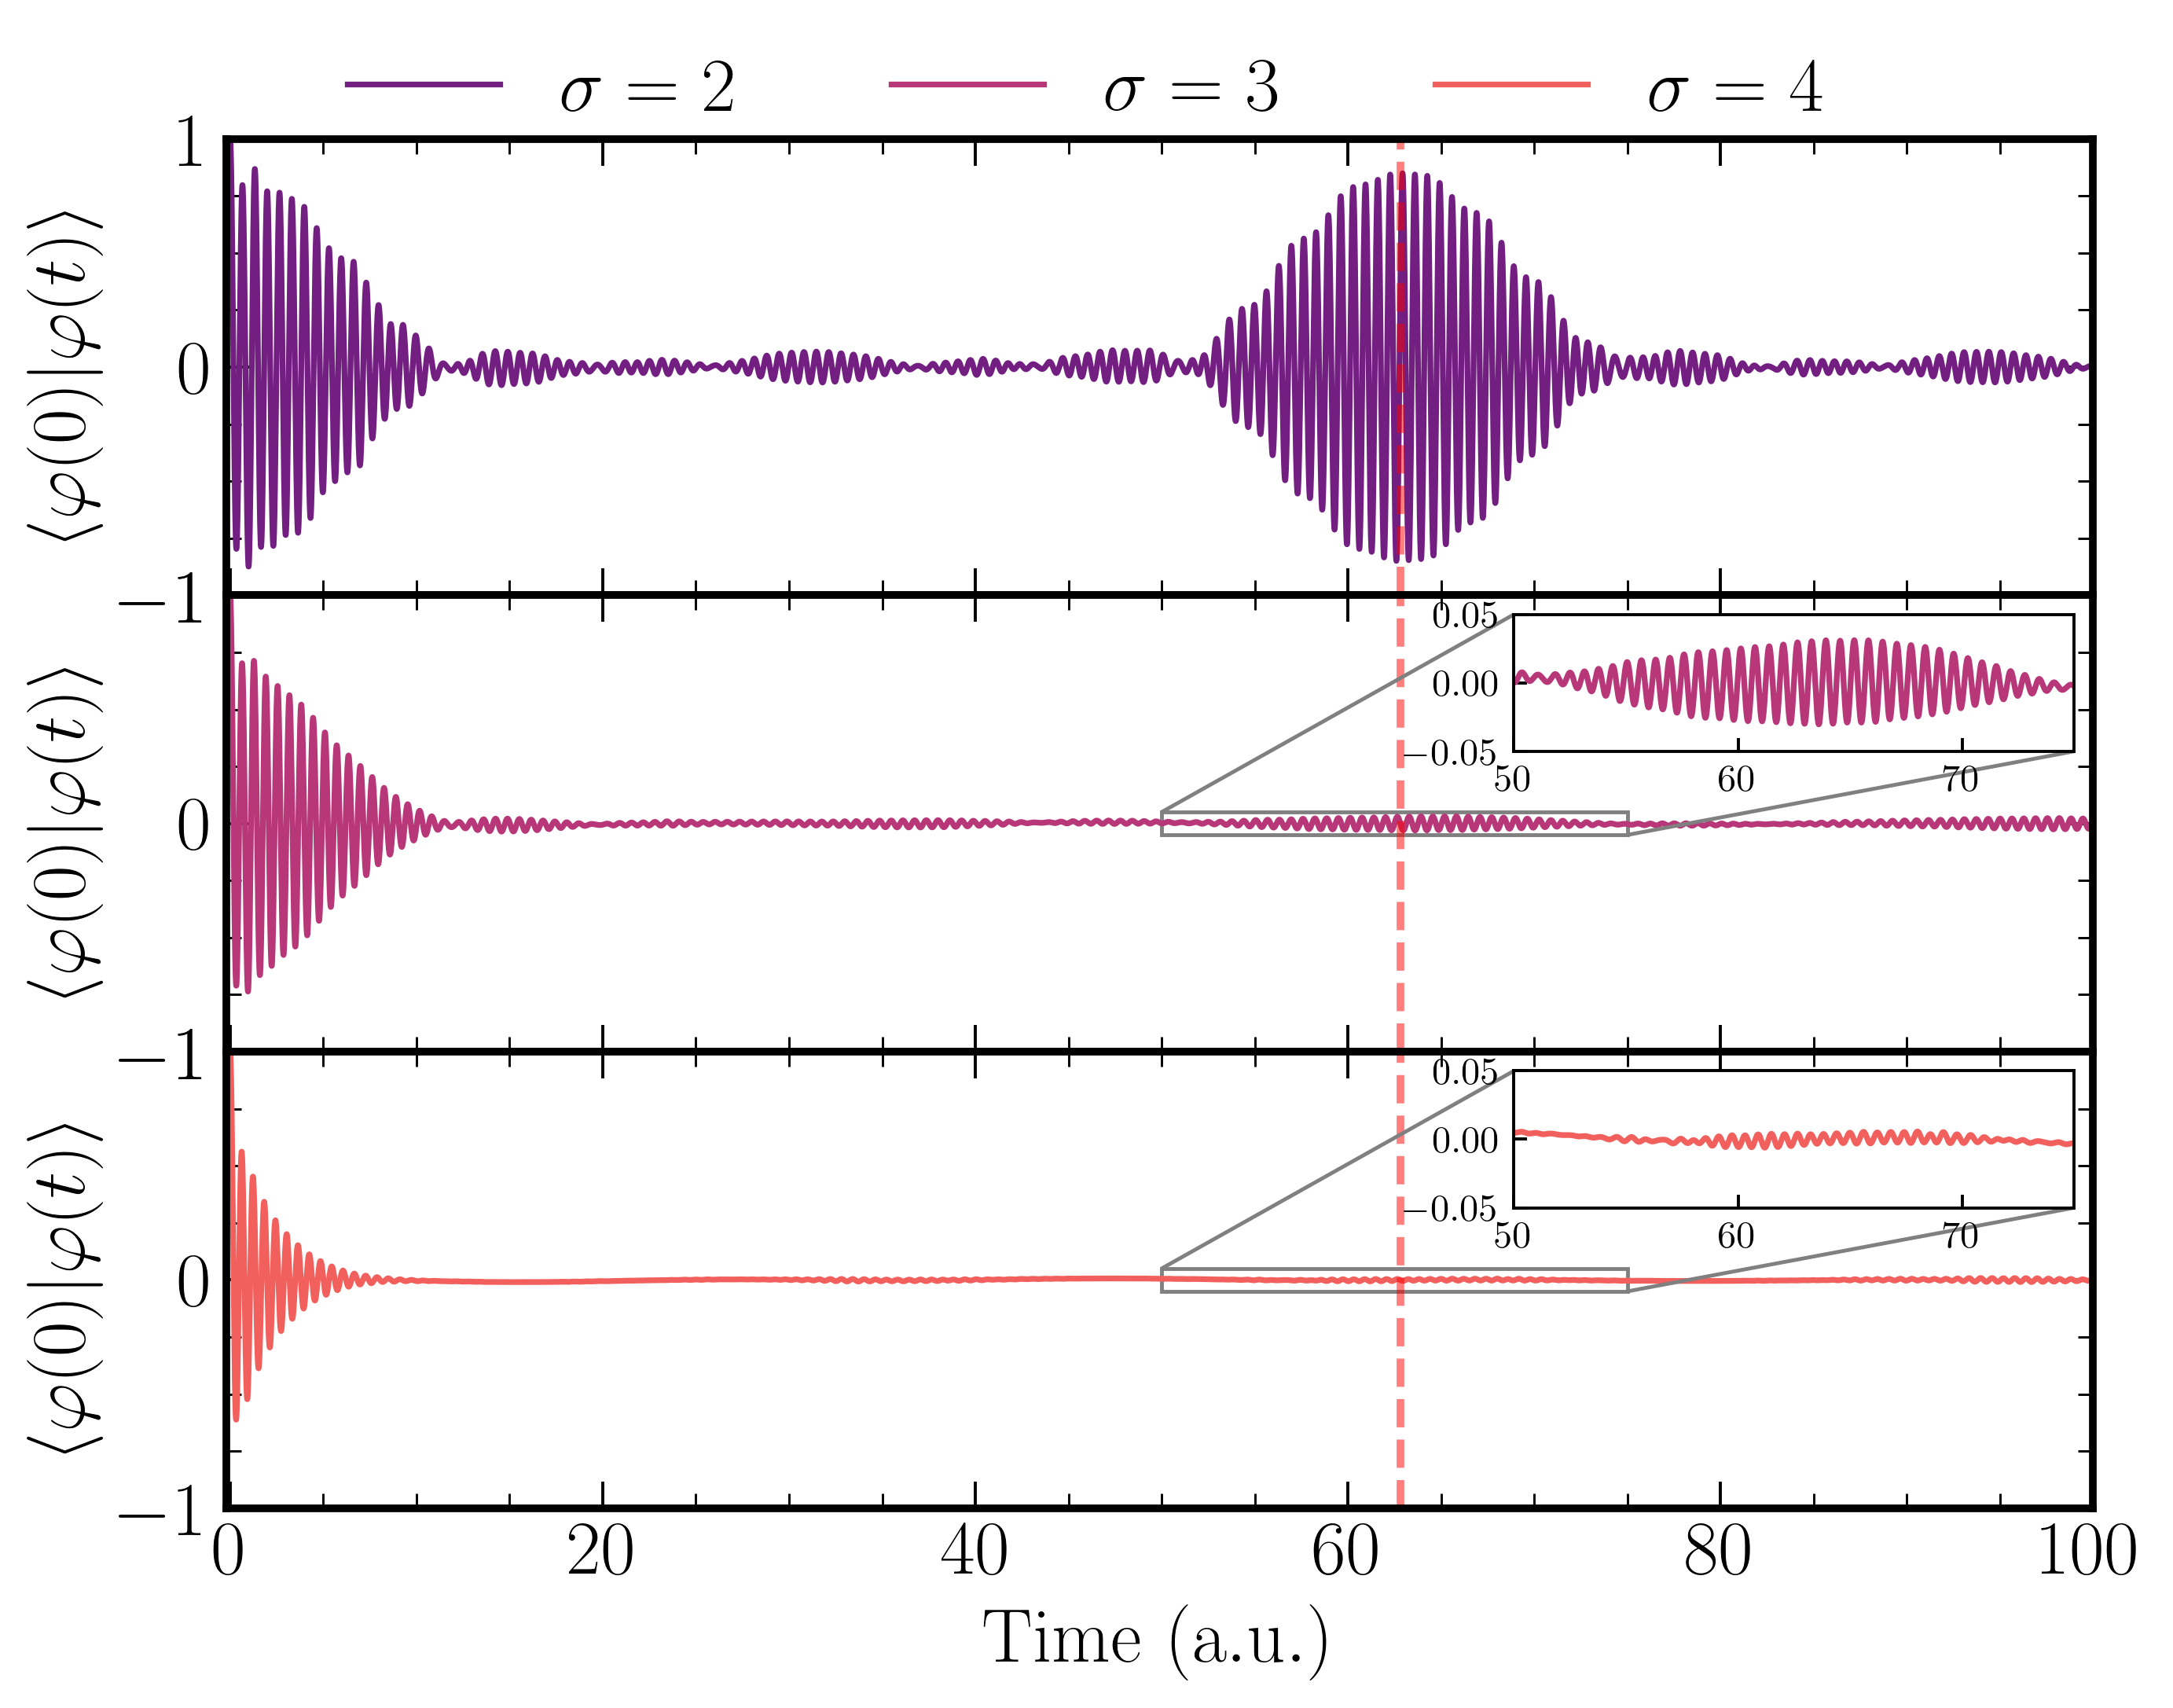

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
fig, axes = plt.subplots(3, 1, sharex=True,sharey=True, figsize=(8, 6), gridspec_kw={'hspace': 0},dpi=350)
color = sm.to_rgba(disorder[0])
axes[2].plot(TIME["1000001,0.01,0.1,{0}".format(disorder[0])], CORR["1000001,0.01,0.1,{0}".format(disorder[0])], color=color, label=r'$\sigma=4$')

# 创建放大子图的位置和大小
axins = inset_axes(axes[2], width="30%", height="30%", loc='upper right')

# 在放大子图上绘制局部曲线
axins.plot(TIME["1000001,0.01,0.1,{0}".format(disorder[0])], CORR["1000001,0.01,0.1,{0}".format(disorder[0])], color=color)
axins.tick_params(axis='both', direction='in')
# 设置放大区域
x1, x2, y1, y2 = 50, 75, -0.05, 0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# 添加指示箭头
mark_inset(axes[2], axins, loc1=2, loc2=4, fc="none", ec="0.5")


for i in np.arange(1, 2)*(2*np.pi/0.1):
    axes[2].axvline(i, color='red', linestyle='--', alpha=0.5,linewidth=2)

color = sm.to_rgba(disorder[1])
axes[1].plot(TIME["1000001,0.01,0.1,{0}".format(disorder[1])], CORR["1000001,0.01,0.1,{0}".format(disorder[1])], color=color, label=r'$\sigma=3$')

# 创建放大子图的位置和大小
axins = inset_axes(axes[1], width="30%", height="30%", loc='upper right')

# 在放大子图上绘制局部曲线
color = sm.to_rgba(disorder[1])
axins.plot(TIME["1000001,0.01,0.1,{0}".format(disorder[1])], CORR["1000001,0.01,0.1,{0}".format(disorder[1])], color=color)
axins.tick_params(axis='both', direction='in')
# 设置放大区域
x1, x2, y1, y2 = 50, 75, -0.05, 0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# 添加指示箭头
mark_inset(axes[1], axins, loc1=2, loc2=4, fc="none", ec="0.5")



for i in np.arange(1, 2)*(2*np.pi/0.1):
    axes[1].axvline(i, color='red', linestyle='--', alpha=0.5,linewidth=2)
color = sm.to_rgba(disorder[2])
axes[0].plot(TIME["1000001,0.01,0.1,{0}".format(disorder[2])], CORR["1000001,0.01,0.1,{0}".format(disorder[2])], color=color, label=r'$\sigma=2$')
for i in np.arange(1, 2)*(2*np.pi/0.1):
    axes[0].axvline(i, color='red', linestyle='--', alpha=0.5,linewidth=2)




# 添加图例
for ax in axes:
    minor_locator_x = MultipleLocator(5)
    minor_locator_y = MultipleLocator(0.25)
    ax.xaxis.set_minor_locator(minor_locator_x)
    ax.yaxis.set_minor_locator(minor_locator_y)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.set_ylim(-1,1)
    ax.set_xlim(-0.2,100)
    ax.set_ylabel(r'$\langle \varphi(0)| \varphi(t) \rangle$',fontsize=20)
    # 设置整个图形的边框粗度
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=20, size=7)
    # 增加次刻度的高度
    ax.tick_params(axis='both', which='minor', length=4)

axes[2].set_xlabel(r'$\mathrm{Time \ (a.u.)}$',fontsize=20)

# 在整张图的顶部创建一个新的轴用于图例
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(axes), frameon=False, fontsize=20)
plt.tight_layout()